In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()

# CW Proposal

Creating a visual representation of [best responses and nash equilibria](https://vknight.org/gt/chapters/04/); looking into 2d spaces in detail and how this could be expanded into 3d.

From the syntax in the notes it is shown that we can represent a stratergy space, $S$, of a player as $\sigma_r = (x,1-x)$ or $\sigma_c = (y,1-y)$ depending on if were talking about a row player or a column player repectivly. In this example we will be looking at both players at the same time and discussing how we identify the best moves for each.

For example, we are playing as the row player and will have play off matrix $A$ and a set of stratergies $\sigma_r = (x,1-x)$. If we are given the mixed stratergy $\sigma_c = (y,1-y)$ how can we visualise the expected utility of our stratergy $(x,1-x)$ more effectivly? Depending on what is selected for $y$ we want to see what its like for given values of $x$.

This leads to the construction of a function of 2 variables to describe how a players expected utility can change. it can also visually show where on the plane the nash equlibria is and what it "looks" like. We can look at this for a veriety of games (and possibly building an interactive tool); For example lets take the example of the adjusted matching pennies game:

$$A=
\begin{pmatrix}
2 & -2 \\
-1 & 1
\end{pmatrix}
\quad
B=
\begin{pmatrix}
-2 & 2 \\
1 & -1
\end{pmatrix}
$$

And we also have 
$$\sigma_r = (x,1-x) \quad \sigma_c = (y,1-y)$$

The expected utility or the row player, $u_r$ is given as:
$$u_r=\sigma_r A \sigma_c^T$$
or:
$$
\begin{align}
u_r & = 
\begin{pmatrix}
x & 1-x
\end{pmatrix} 
\begin{pmatrix}
2 & -2 \\
-1 & 1
\end{pmatrix} 
\begin{pmatrix}
y\\
1-y
\end{pmatrix}\\ 
    & = [3x−1,−3x+1] \begin{pmatrix}
y\\
1-y
\end{pmatrix} \\
    & = y(3x−1)+(−3x+1)(−y+1)\\
    & = 6xy−3x−2y+1
\end{align}$$

Using this we can then plot what this looks like using a 2d heatmap with the players expected utility coloured depending on what their opponent may do. We can also generalise this case to a generic utlity matrix M; the funcitons `get_expression()` and `f()` below shows how this can be done using a package called sympy.

In [125]:
x=np.arange(0,1,0.01)
y=np.arange(0,1,0.01)
X,Y=np.meshgrid(x,y)

def getExpression(M):
    a, b = sym.symbols('a, b')
    A = sym.Matrix(M)
    sigma_r = sym.Matrix([[a, 1-a]])
    sigma_c = sym.Matrix([b, 1-b])
    res=(sigma_r * A *  sigma_c)[0]
    funct = sym.lambdify((a,b), res)
    return funct

def f(x,y,M):
    funct = getExpression(M)
    return funct(x,y)

def get_contr_plot(M, title, subplot_loc):
    plt.subplot(subplot_loc)
    Z = f(X,Y,M)
#     plt.contourf(X,Y,Z,np.arange(np.amin(Z)-0.1,np.amax(Z)+0.1,0.5),cmap='RdYlGn')
    plt.contourf(X,Y,Z,cmap='RdYlGn')
    plt.colorbar()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")

Below are expected utility heatmaps showing utilities for 2 games: 
 * **G1** is the matching pennies game (zero sum):$\quad A=\begin{pmatrix}1&-1\\-1&1\end{pmatrix}\quad B=-A$
 * **G2** is a made up game that could represent any situation (not-zero sum): $\quad A=\begin{pmatrix}1&4\\-3&2\end{pmatrix}\quad B=\begin{pmatrix}5&2\\-1&9\end{pmatrix}$

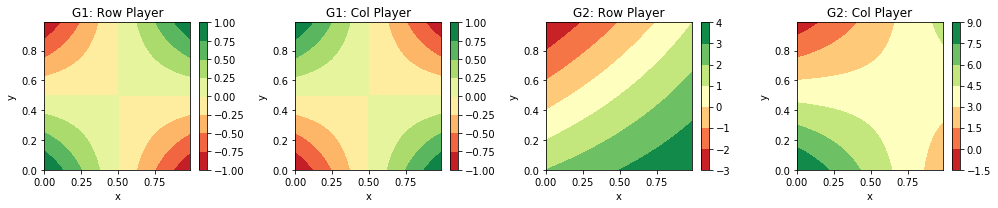

In [129]:
A = np.array([[1,-1],[-1,1]])
B = np.array([[-1,1],[1,-1]])
A2 = np.array([[1,4],[-3,2]])
B2 = np.array([[5,2],[-1,9]])

plt.figure(figsize=(14,3))
get_contr_plot(A,"G1: Row Player",141)
get_contr_plot(B,"G1: Col Player",142)
get_contr_plot(A2,"G2: Row Player",143)
get_contr_plot(B2,"G2: Col Player",144)
plt.tight_layout()

This map can be thought of as a function $f(a,b,c,d,x,y)= axy−bxy+bx−cxy+cy+dxy−dx−dy+d$. (This is just the expansion of the matix eqn $u=\sigma_r M \sigma_c^T$ for an arbitrary $M$). Recall the definition of a best response:
$$\text{A best response } \sigma^*_r \text{ is one where: } \sigma^*_r = argmax_{\sigma_r \in S_r}(\sigma_r M \sigma_c^T)$$
We can look at this in the context of $f$ with a fixed $a,b,c,d$; by looking at the partial derivatives of $f$ & finding stationary points we can find the location of these best responses analytically:

### Points to cover:
    - visual proof of best response
    - nash equilibria
    - nondegenerate stratergy

In [138]:
a,b,c,d,x,y = sym.symbols('a,b,c,d,x,y')
M = sym.Matrix([[a,b],[c,d]])
sigma_r = sym.Matrix([[x, 1-x]])
sigma_c = sym.Matrix([y, 1-y])
eqn=((sigma_r * M) *sigma_c).expand()[0]
eqn

In [141]:
eqnDx = eqn.diff(x)
eqnDx

In [139]:
eqnDy = eqn.diff(y)


In [144]:
eqn2 = eqn.subs([(a,3),(b,0),(c,5),(d,1)])
eqn2 

TypeError: unsupported operand type(s) for ^: 'Mul' and 'Add'